## **ZUBIN JAMES PALIT**

## **ASSIGNMENT 2**

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
df=pd.read_csv('/content/drug200.csv')
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [23]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<Axes: xlabel='Drug', ylabel='count'>

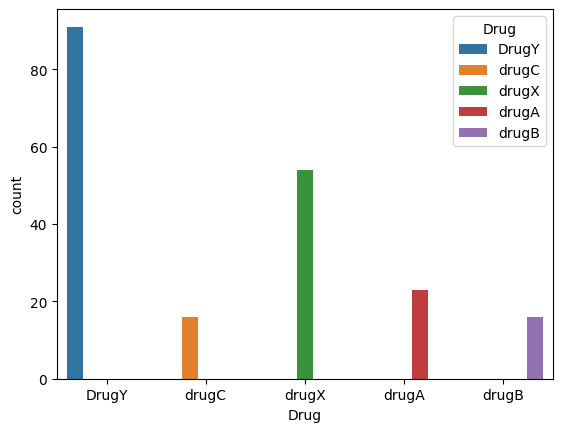

In [25]:
sns.countplot(x='Drug',data=df,hue='Drug')
#plotting the dependent variable

In [26]:
features = df.drop('Drug', axis=1)
labels = df['Drug']

In [27]:
#encoding
categorical_features = ['Sex', 'BP', 'Cholesterol']
label_encoder = LabelEncoder()
for feature in categorical_features:
    features[feature] = label_encoder.fit_transform(features[feature])

In [28]:
# Normalize the numerical features
numerical_features = ['Age', 'Na_to_K']
scaler = StandardScaler()
features[numerical_features] = scaler.fit_transform(features[numerical_features])
label_encoder.fit(labels)
labels = label_encoder.transform(labels)

In [29]:
Y_class = len(np.unique(labels))
print(Y_class)

5


In [30]:
#Building the ANN model
reg_model = Sequential()
reg_model.add(Dense(64, activation='relu', input_dim=5))  # Input layer
reg_model.add(Dense(128, activation='relu'))  # Hidden layer 1
reg_model.add(Dense(64, activation='relu'))  # Hidden layer 2
reg_model.add(Dense(32, activation='relu'))  # Hidden layer 3
reg_model.add(Dense(5, activation='softmax'))  # Output layer

reg_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
#Training the  model
#First splitting the dataset into training and testing data. Test data is 30% of Training data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(140, 5) (60, 5) (140,) (60,)


In [32]:
# Train the model
reg_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 1.5352 - accuracy: 0.3357
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 1.3502 - accuracy: 0.5929
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 1.1658 - accuracy: 0.6143
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 1.0019 - accuracy: 0.6786
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.8483 - accuracy: 0.7071
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.7227 - accuracy: 0.7786
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6181 - accuracy: 0.7929
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5249 - accuracy: 0.8143
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.4583 - accuracy: 0.8500
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3944 - accuracy: 0.8643
Epoch 11/100
5/5 [===========

In [33]:
ypred = reg_model.predict(X_test)

2/2 [==============================] - 0s 7ms/step


In [34]:
# Evaluating the model on the testing set
loss, accuracy = reg_model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

2/2 [==============================] - 0s 7ms/step - loss: 0.0870 - accuracy: 0.9667
Test loss: 0.08701004832983017
Test accuracy: 0.9666666388511658
